# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Converting the Data and Price columns to datetime and numeric, respectively.

In [ ]:
df_data.Price = df_data.Price.str.replace(',', '')
df_data.Price = pd.to_numeric(df_data.Price)

In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True, format='mixed')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0.1    4324 non-null   int64              
 1   Unnamed: 0      4324 non-null   int64              
 2   Organisation    4324 non-null   object             
 3   Location        4324 non-null   object             
 4   Date            4324 non-null   datetime64[ns, UTC]
 5   Detail          4324 non-null   object             
 6   Rocket_Status   4324 non-null   object             
 7   Price           964 non-null    float64            
 8   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 304.2+ KB


In [ ]:
df_data.columns = df_data.columns.str.replace(' ', '')

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.isna().values.sum()

3360

In [ ]:
df_data.isna().any()

Unnamed:0.1       False
Unnamed:0         False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [ ]:
df_data.isnull().any()

Unnamed:0.1       False
Unnamed:0         False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

The first columns I am dropping are the "Unnamed: 0.1" and "Unnamed: 0" columns as they are entirely unneeded.

In [ ]:
clean_data = df_data.drop(['Unnamed:0.1', 'Unnamed:0'], axis=1)

## Descriptive Statistics

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


In [ ]:
clean_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [ ]:
clean_data.Price.describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launches_per_company = clean_data.Organisation.value_counts()
v_bar = px.bar(
        x = launches_per_company.index,
        y = launches_per_company.values,
        color = launches_per_company.values,
        color_continuous_scale='jet',
        title='Number of Launches by Organisation')

v_bar.update_xaxes(tickangle=45)

v_bar.update_layout(xaxis_title='Organisation',
                    yaxis_title='Number of Launches')

v_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
rocket_status = clean_data.Rocket_Status.value_counts()

fig1 = px.pie(labels=rocket_status.index,
              values=rocket_status.values,
              title='Percentage of Active versus Retired Rockets',
              names=rocket_status.index,
              hole=0.2)

fig1.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = clean_data.Mission_Status.value_counts()

fig2 = px.pie(labels=mission_status.index,
              values=mission_status.values,
              title='Distribution of Mission Status',
              names=mission_status.index,
              hole=0.2)

fig2.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

Text(0.5, 1.0, 'How Expensive are the Launches')

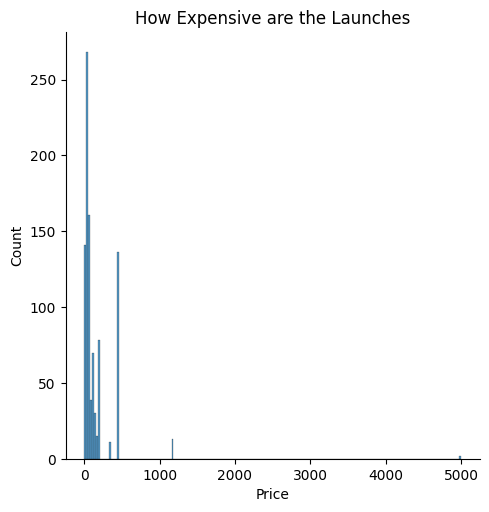

In [ ]:
sns.displot(data=clean_data['Price'])
plt.title('How Expensive are the Launches')

(array([949.,   0.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([   5.3 ,  504.77, 1004.24, 1503.71, 2003.18, 2502.65, 3002.12,
        3501.59, 4001.06, 4500.53, 5000.  ]),
 <BarContainer object of 10 artists>)

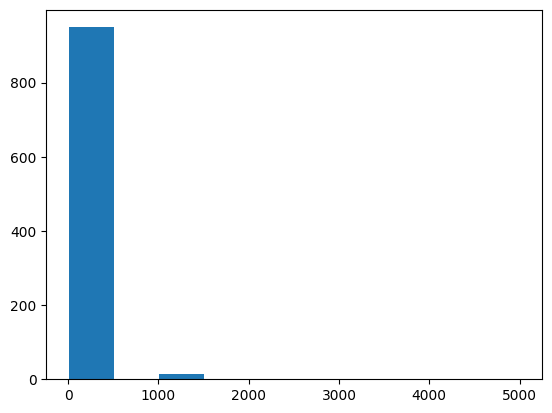

In [ ]:
plt.hist(clean_data['Price'])

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
import iso3166
clean_data["Country"] = clean_data["Location"].str.split(", ").str[-1]

df_data.loc[(clean_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(clean_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(clean_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(clean_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(clean_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(clean_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(clean_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(clean_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(clean_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(clean_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(clean_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso3166.countries_by_alpha3.items()}
clean_data = clean_data.replace({"Country": countries})

In [ ]:
launches = clean_data['Country'].value_counts().rename_axis('Country').reset_index(name='counts')

In [ ]:
map = px.choropleth(launches,
                    locations='Country',
                    color='counts',
                    color_continuous_scale=px.colors.sequential.matter)

map.update_layout(title='Launches by Country')

map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
statuses = clean_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

In [ ]:
map = px.choropleth(failures,
                    locations=failures.index,
                    color='counts',
                    color_continuous_scale=px.colors.sequential.matter)

map.update_layout(title='Number of Failures by County')

map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
country_mission = clean_data.groupby(by=['Country', 'Organisation', 'Mission_Status'], as_index=False).size()

country_mission = country_mission.sort_values('size', ascending=False)

In [ ]:
burst = px.sunburst(country_mission, path=['Country', 'Organisation', 'Mission_Status'],
                    values='size',
                    title='Mission Status by Organisations and Countries')
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
money_spent = clean_data.groupby("Organisation")["Price"].sum().rename_axis(["Organisation"]).reset_index(name='total')

money_spent = money_spent.sort_values('total', ascending=False)

In [ ]:
burst2 = px.sunburst(money_spent, path=['Organisation'],
                     values='total',
                     title='Total Amount of Money Spent by Organisations')
burst2.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
organisation_launches = clean_data['Organisation'].value_counts().rename_axis('Organisation').reset_index(name='counts')

In [ ]:
price_spent_per_launch = money_spent.merge(organisation_launches, how='inner', on='Organisation')

ratio = price_spent_per_launch.total / price_spent_per_launch.counts

price_spent_per_launch['Ratio'] = ratio

In [ ]:
v_bar = px.bar(
        x = price_spent_per_launch.Organisation,
        y = price_spent_per_launch.Ratio,
        color = price_spent_per_launch.Ratio,
        color_continuous_scale='jet',
        title='Money Spent by Organisation per Launch')

v_bar.update_xaxes(tickangle=45,
                   categoryorder='total descending')

v_bar.update_layout(xaxis_title='Organisation',
                    yaxis_title='Total Spent per Launch')

v_bar.show()

# Chart the Number of Launches per Year

In [ ]:
import matplotlib.dates as mdates

In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
 7   Country         4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 270.4+ KB


In [ ]:
launches_per_year = clean_data.groupby(clean_data.Date.dt.year).count()

In [ ]:
fig4 = px.bar(x=launches_per_year.index, y=launches_per_year.Rocket_Status, orientation='v', title="Number of Launches per Year")
fig4.show()

In [ ]:
launches_per_company = clean_data.Organisation.value_counts()
v_bar = px.bar(
        x = launches_per_company.index,
        y = launches_per_company.values,
        color = launches_per_company.values,
        color_continuous_scale='jet',
        title='Number of Launches by Organisation')

v_bar.update_xaxes(tickangle=45)

v_bar.update_layout(xaxis_title='Organisation',
                    yaxis_title='Number of Launches')

v_bar.show()

In [ ]:
clean_data['year'] = clean_data['Date'].apply(lambda datetime: datetime.year)

launches_per_year = clean_data['year'].value_counts().reset_index()
launches_per_year.columns = ['year', 'count']

In [ ]:
fig4 = px.bar(launches_per_year, x='year', y='count', orientation='v', title="Number of Launches per Year")
fig4.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
launches_per_month_by_year = clean_data.resample('M', on='Date').count()

In [ ]:
launches_per_month_by_year.head()

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,Country,year
Date,,,,,,,,
1957-10-31 00:00:00+00:00,1,1,1,1,0,1,1,1
1957-11-30 00:00:00+00:00,1,1,1,1,0,1,1,1
1957-12-31 00:00:00+00:00,1,1,1,1,0,1,1,1
1958-01-31 00:00:00+00:00,0,0,0,0,0,0,0,0
1958-02-28 00:00:00+00:00,2,2,2,2,0,2,2,2


In [ ]:
roll_avg = launches_per_month_by_year.rolling(window=12).mean()

In [ ]:
roll_avg.head()

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,Country,year
Date,,,,,,,,
1957-10-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-11-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fig5 = px.bar(x=launches_per_month_by_year.index, y=launches_per_month_by_year.Rocket_Status, orientation='v', title="Number of Launches per Year")
fig5.show()

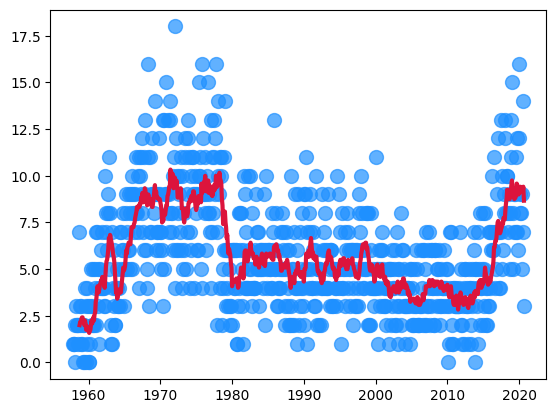

In [ ]:
plt.scatter(x=launches_per_month_by_year.index,
           y=launches_per_month_by_year.Rocket_Status,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

plt.plot(launches_per_month_by_year.index,
        roll_avg.Rocket_Status,
        c='crimson',
        linewidth=3,)

plt.show()

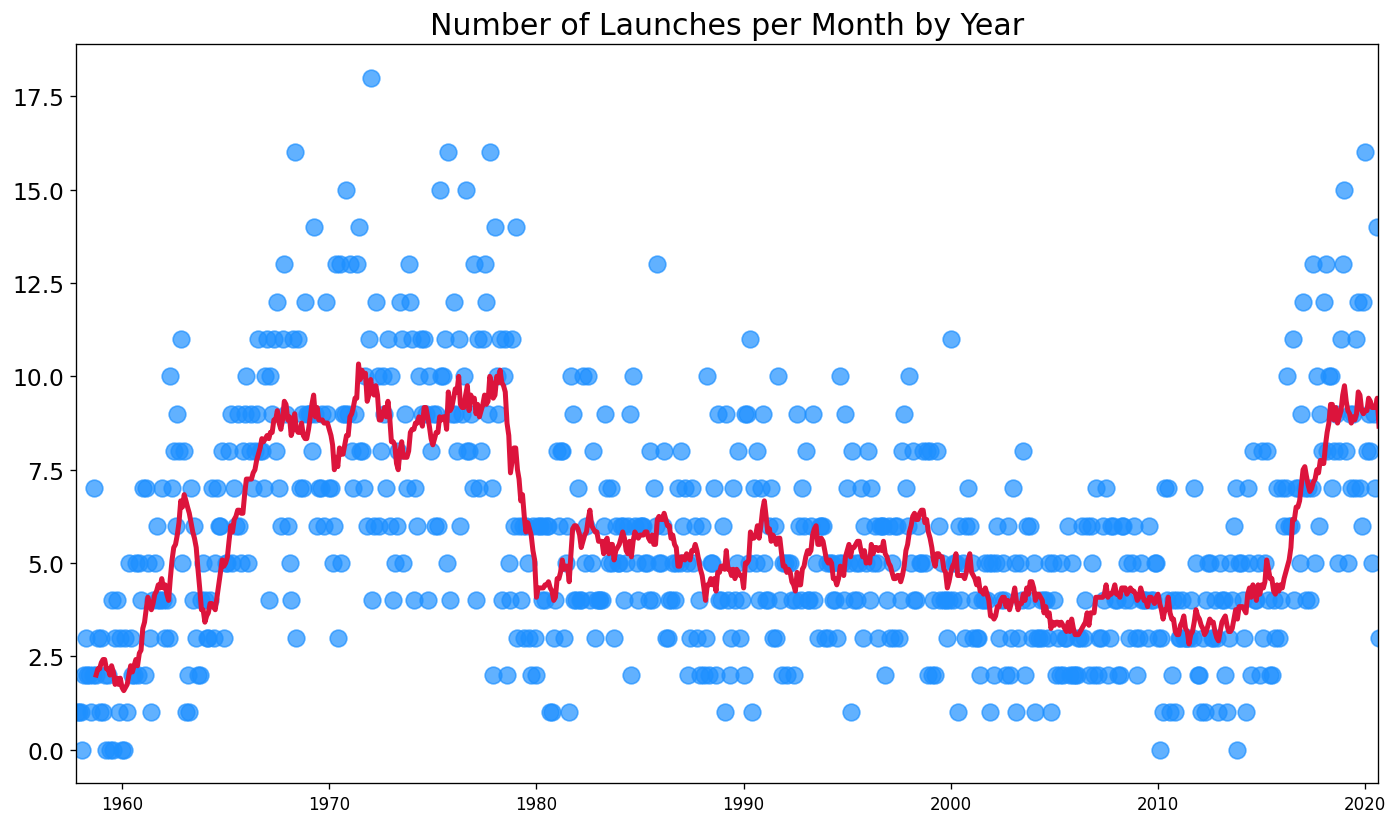

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Number of Launches per Month by Year', fontsize=18)
plt.yticks(fontsize=14)


ax = plt.gca() # get current axis
ax.set_xlim(clean_data.Date.min(), clean_data.Date.max())

ax.scatter(launches_per_month_by_year.index,
           launches_per_month_by_year.Rocket_Status,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(launches_per_month_by_year.index,
        roll_avg.Rocket_Status,
        c='crimson',
        linewidth=3,)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
launches_per_month = clean_data.groupby(clean_data.Date.dt.month).count()

In [ ]:
launches_per_month.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,year
Date,,,,,,,,,
1,268,268,268,268,268,66,268,268,268
2,336,336,336,336,336,60,336,336,336
3,353,353,353,353,353,77,353,353,353
4,383,383,383,383,383,91,383,383,383
5,326,326,326,326,326,86,326,326,326


In [ ]:
fig5 = px.bar(x=launches_per_month.index, y=launches_per_month.Rocket_Status, orientation='v', title="Number of Launches per Year")
fig5.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
avg_price = clean_data[clean_data['Price'].notna()]

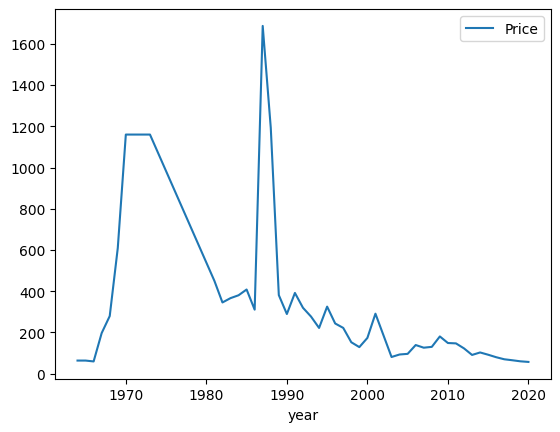

In [ ]:
fig6 = avg_price.groupby('year')['Price'].mean().plot(legend=True)

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

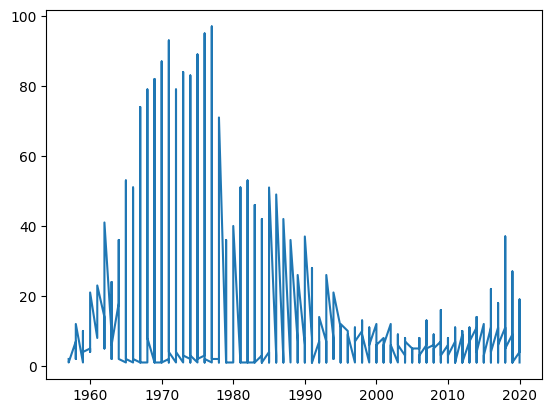

In [ ]:
launch_by_year = clean_data.groupby(['year', 'Organisation'], as_index=False).size()
launch_by_year.rename(columns = {'size' : "Total"}, inplace = True)
plt.plot(launch_by_year.year, launch_by_year.Total)

<Axes: xlabel='year', ylabel='Total'>

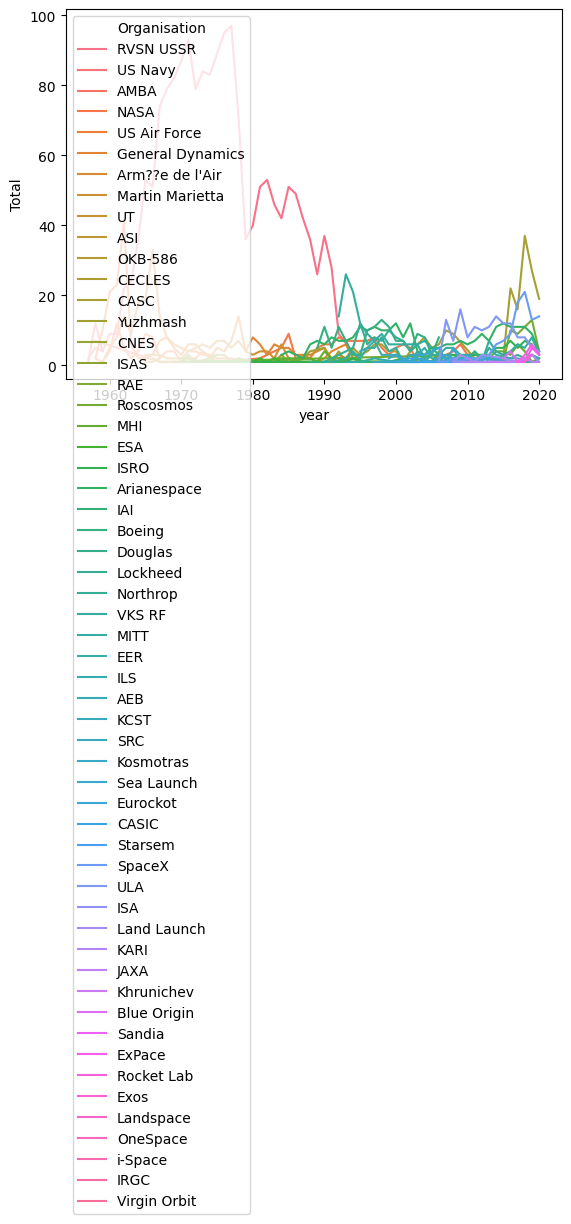

In [ ]:
sns.lineplot(data=launch_by_year, x='year', y='Total', hue='Organisation')

In [ ]:
top_10 = clean_data['Organisation'].value_counts()
top_10.head(10)

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

In [ ]:
top_10.to_frame()
top_10 = top_10.head(10)

In [ ]:
top_10.head()

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
Name: count, dtype: int64

In [ ]:
top_10.tail()

Organisation
VKS RF             201
US Air Force       161
ULA                140
Boeing             136
Martin Marietta    114
Name: count, dtype: int64

In [ ]:
top_orgs = launch_by_year[launch_by_year.Organisation.isin(top_10.index)]

<Axes: xlabel='year', ylabel='Total'>

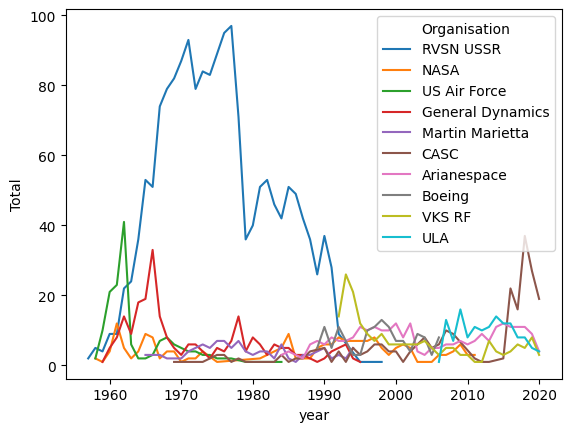

In [ ]:
sns.lineplot(data=top_orgs, x='year', y='Total', hue='Organisation')

Below is various brainstorming attempts


In [ ]:
top_10 =

In [ ]:
top_orgs = clean_data.groupby(by=['year', 'Organisation'], as_index=False).size()
top_orgs = top_orgs.sort_values(by=['size'], ascending=False).head(10)
top_orgs.head(10)

,year,Organisation,size
139,1977,RVSN USSR,97
132,1976,RVSN USSR,95
93,1971,RVSN USSR,93
125,1975,RVSN USSR,89
80,1970,RVSN USSR,87
108,1973,RVSN USSR,84
115,1974,RVSN USSR,83
67,1969,RVSN USSR,82
60,1968,RVSN USSR,79
101,1972,RVSN USSR,79


In [ ]:
top_orgs = clean_data.groupby(by=['Organisation', 'year'], as_index=False).count()
top_orgs = top_orgs.sort_values('year')[['year', 'Organisation']].head(10)
top_orgs.reset_index(inplace=True)
#top_orgs.sort_values(index, ascending=False)
top_orgs.head(10)

,index,year,Organisation
0,623,1957,US Navy
1,497,1957,RVSN USSR
2,598,1958,US Air Force
3,624,1958,US Navy
4,3,1958,AMBA
5,417,1958,NASA
6,498,1958,RVSN USSR
7,625,1959,US Navy
8,418,1959,NASA
9,164,1959,General Dynamics


<Axes: xlabel='year', ylabel='None'>

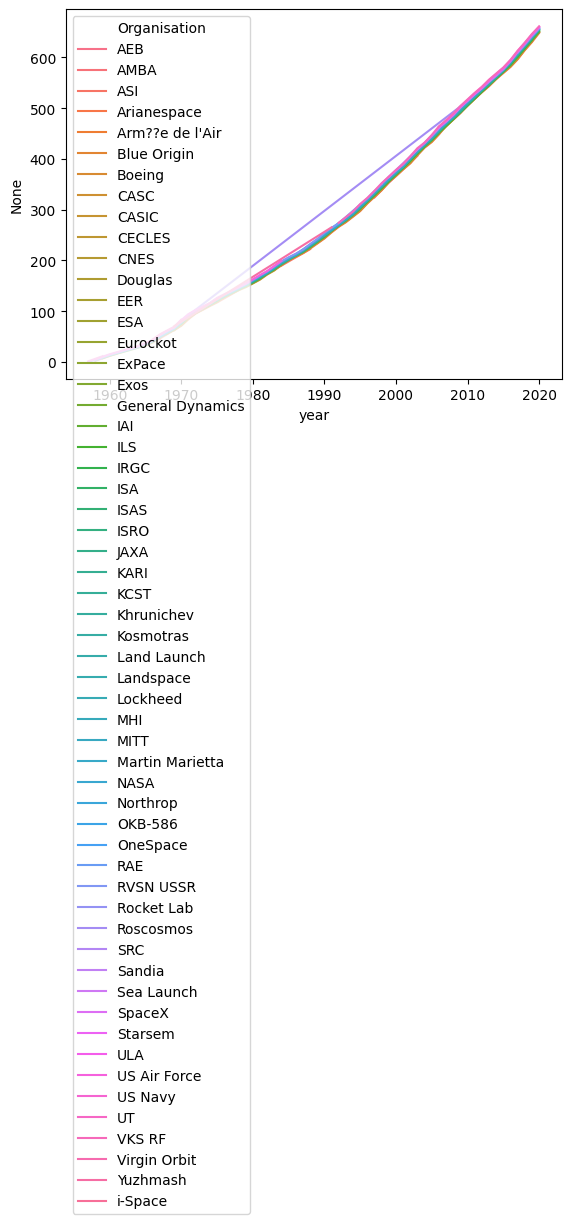

In [ ]:
sns.lineplot(data=top_orgs, x='year', y=top_orgs.index, hue='Organisation')

In [ ]:
top_orgs = clean_data.groupby(by=['year', 'Organisation']).size().reset_index() ## New DF for grouped data
#top_orgs.rename(columns = {0 : 'Counts'}, inplace = True)
#top_orgs.sort_values(['Organisation'], inplace=True)

#for i, org in enumerate(top_orgs.Organisation.unique()):
#    plt.plot(top_orgs[top_orgs.Organisation == org].year, top_orgs[top_orgs.Organisation == org].Counts, '-o', label=org)
#plt.gcf().autofmt_xdate() ## Rotate X-axis so you can see dates clearly without overlap
#plt.legend() ## Show legend

In [ ]:
df_grouped = clean_data.groupby(by=['Organisation', 'year'],as_index=False).size().reset_index()
df_grouped['total'] = df_grouped.Organisation.value_counts()

In [ ]:
org_total = clean_data.groupby(by=['Organisation', 'year'], as_index=False).size().reset_index()
org_total.rename(columns = {'size' : "Total"}, inplace = True)
org_total = org_total.sort_values('Total', ascending=False)

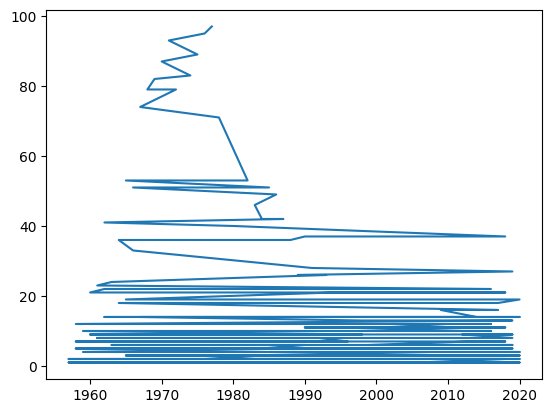

In [ ]:
plt.plot(org_total.year, org_total.Total)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
launch_by_country = clean_data.groupby(['year', 'Country'], as_index=False).size()
launch_by_country.rename(columns = {'size' : "Total"}, inplace = True)


In [ ]:
lead_country_by_year = launch_by_country.loc[launch_by_country.groupby('year')['Total'].idxmax()]

In [ ]:
lead_country_by_year.head()

,year,Country,Total
0,1957,KAZ,2
3,1958,USA,23
5,1959,USA,16
7,1960,USA,30
10,1961,USA,43


In [ ]:
v_bar = px.bar(
        x = lead_country_by_year.year,
        y = lead_country_by_year.Total,
        color = lead_country_by_year.Country,
        color_continuous_scale='jet',
        title='Most Prominent Country by Launches per Year')

v_bar.update_layout(xaxis_title='Year',
                    yaxis_title='Number of Launches')

v_bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
launch_by_organisation = clean_data.groupby(['year', 'Organisation'], as_index=False).size()
launch_by_organisation.rename(columns = {'size' : "Total"}, inplace = True)

In [ ]:
lead_organization_by_year = launch_by_organisation.loc[launch_by_organisation.groupby('year')['Total'].idxmax()]

In [ ]:
lead_organization_by_year.head()

,year,Organisation,Total
0,1957,RVSN USSR,2
6,1958,US Navy,12
10,1959,US Air Force,10
15,1960,US Air Force,21
19,1961,US Air Force,23


<Axes: xlabel='year', ylabel='Total'>

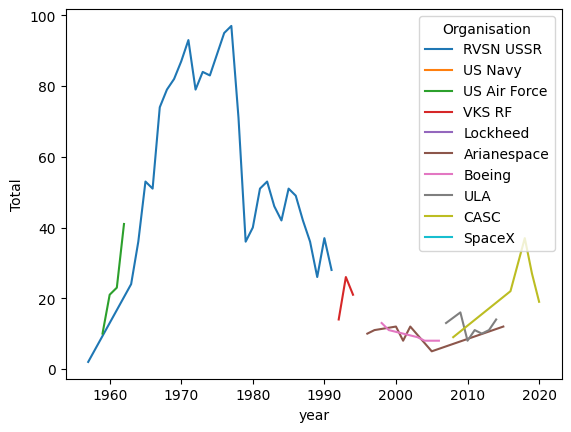

In [ ]:
sns.lineplot(data=lead_organization_by_year, x='year', y='Total', hue='Organisation')

In [ ]:
v_bar = px.bar(
        x = lead_organization_by_year.year,
        y = lead_organization_by_year.Total,
        color = lead_organization_by_year.Organisation,
        color_continuous_scale='jet',
        title='Most Prominent Organisation by Launches per Year')

v_bar.update_layout(xaxis_title='Year',
                    yaxis_title='Number of Launches')

v_bar.show()